In [27]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import TCS_functions as tcs

In [2]:
# Sample data
data = {
    'Country': ['United States', 'Canada', 'Brazil', 'United Kingdom', 'Germany', 'France', 'India', 'China', 'Japan', 'Australia'],
    'Sales': [1000, 850, 780, 920, 670, 600, 950, 1100, 730, 680]
}
df = pd.DataFrame(data)

# Plotting with plotly
fig = px.choropleth(df, locations="Country",
                    locationmode='country names',
                    color="Sales",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(title='Sales Data by Country')
fig.show()


In [44]:
def generate_all_data():

    countries = tcs.country_list()

    data_list = []

    for country in countries:
        data = tcs.TCSpipelineCountry(country=country)
        tcs.fill_m_q_p(data)
        tcs.name_columns_rows(data)
        tcs.add_df_titles(df_list=data,country=country)

        data_list.append(data)
    
    data_dict = dict(zip(countries,data_list))

    return data_dict

In [45]:
index = tcs.df_indice_list()
data = generate_all_data()

/Users/cameroncochrane/Library/CloudStorage/OneDrive-Personal/Libertas Data/Projects/Example Projects/Toy Car Sales Project/tcs_streamlit/TCS_functions.py:152: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.

/Users/cameroncochrane/Library/CloudStorage/OneDrive-Personal/Libertas Data/Projects/Example Projects/Toy Car Sales Project/tcs_streamlit/TCS_functions.py:162: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.

/Users/cameroncochrane/Library/CloudStorage/OneDrive-Personal/Libertas Data/Projects/Example Projects/Toy Car Sales Project/tcs_streamlit/TCS_functi

In [34]:
countries = tcs.country_list()
sales = []

for country in countries:
    sales.append(data[f'{country}'][index['country_monthly_total_sales']][f'{country} Total Sales by Month']['Sales ($)'].sum())

country_sales = dict(zip(countries,sales))

In [38]:
list(country_sales.keys())

['USA',
 'Germany',
 'Norway',
 'Spain',
 'Denmark',
 'Italy',
 'Philippines',
 'UK',
 'Sweden',
 'France',
 'Belgium',
 'Singapore',
 'Austria',
 'Australia',
 'Finland',
 'Canada',
 'Japan',
 'Ireland',
 'Switzerland']

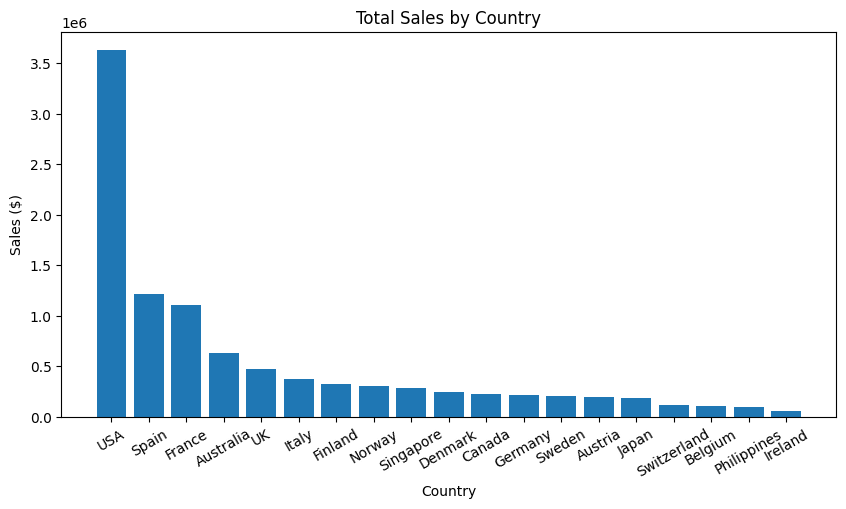

In [43]:
    


    #Sorting the data in descending order:
    data = list(zip(countries,sales))
    data.sort(key=lambda x: x[1], reverse=True)
    sorted_countries,sorted_sales = zip(*data)

    fig, ax = plt.subplots(figsize=(10,5))
    ax.bar(x=sorted_countries,height=sorted_sales)
    ax.set_title(f'Total Sales by Country')
    ax.set_xlabel('Country')
    ax.tick_params(axis='x', labelsize=10, rotation=30)
    ax.set_ylabel('Sales ($)')
    plt.show()